In [1]:
!ls /media/hdd1

Anaconda3-5.0.0.1-Linux-x86_64.sh  MSongsDB
bazel-build-examples		   nvidia-digits
chainerrl			   nvidia-docker
cpp-ethereum			    programs
crawler				   pytorch
cuda_exaample			   RoboND-CNN-Lab
dataset				   RoboND-DeepLearning-Project
DeepLearning_Presentation.tar.gz   RoboND-Python-StarterKit
faiss				   RoboND-Segmentation-Lab
fastText-0.1.0			   sd_readfile.py
hive-testbench			   spring-boot
hyperledge-composer		   tensorflow
JSAnimation			   tf-sq2seq
lost+found			   tpcds
merged_file.txt			   v0.1.0.zip


In [20]:
import pandas as pd
import numpy as np
import math

In [87]:
from datetime import date, timedelta
import time

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [101]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [15]:
cd mta

/Users/Tahmid/Documents/Metis/Data Science/projects/project1/Pickle Files/mta


In [17]:
import pickle

In [37]:
mta_data = pd.read_pickle('mta_datetime.pkl')

In [31]:
ls

Analysis Plan.ipynb
DownloadData.ipynb
GeoJSON Mapping.ipynb
MTA Data Analysis (Tahmid).ipynb
MTA Data Analysis-Copy1.ipynb
MTA Data Analysis.ipynb
MTADataAnalysis-Copy1.ipynb
MTADataAnalysis-FINAL.ipynb
MTADataAnalysis.ipynb
MTA_RAIL_MAP.jpg
Project 1 Group 8 Presentation v1.pptx
README.md
Subway Stations 20.geojson
Subway Stations.geojson
TechCompany_MAP.png
file_cleaner.sh*
merged_file.txt
mta_datetime.pkl
turnstile_190330.txt
~$Project 1 Group 8 Presentation v1.pptx


In [32]:
mta_data = pd.read_csv("merged_file.txt")

In [4]:
# mta_data["DATE TIME"] = mta_data["DATE"] + " " + mta_data["TIME"]

In [9]:
# mta_data["DATE TIME"].head()
# mta_data["DATETIME2"] = pd.to_datetime(mta_data["DATE TIME"])

In [38]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME,DATETIME2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558,12/30/2017 03:00:00,12/30/2017 03:00:00,2017-12-30 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567,12/30/2017 07:00:00,12/30/2017 07:00:00,2017-12-30 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654,12/30/2017 11:00:00,12/30/2017 11:00:00,2017-12-30 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736,12/30/2017 15:00:00,12/30/2017 15:00:00,2017-12-30 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803,12/30/2017 19:00:00,12/30/2017 19:00:00,2017-12-30 19:00:00


In [39]:
# Clean up the data
mta_cleaned_data = mta_data[(mta_data.EXITS != 0) | (mta_data.ENTRIES != 0)]

In [40]:
len(mta_cleaned_data)

10344462

In [41]:
mta_cleaned_data.to_pickle("mta_datetime.pkl")

In [43]:
#Lets Clean the Data
#Step 1 we are going to remove all the bad dates data which are not actual 4 hour window
# There are datasets which are poorly aggregated
valid_time_list = []
for i in mta_cleaned_data["TIME"].unique():
    if (i.split(":")[1] == "00" and i.split(":")[2] =="00"):
        valid_time_list.append(i)

mta_cleaned_data_filtered_valida_date = mta_cleaned_data.loc[mta_cleaned_data["TIME"].isin(valid_time_list)]       

In [18]:
#Now lets check the rows of the files
# number of rows before was 10344462
len(mta_cleaned_data_filtered_valida_date)

9439309

In [52]:
# So total data that we cleaned is 9439309
# So the percentage change
change_percent = ((len(mta_cleaned_data) - len(mta_cleaned_data_filtered_valida_date)))
print(change_percent/len(mta_cleaned_data))

0.08750121562629357


In [46]:
# Percentatge of files dropped in 8.7%
# Which is insignificant

In [30]:
# Lets add the total for all the Entries and Exits
#This will give us a gross idea of the top 20 stations
#The turnstile data always increment. So we would have to do a diff between the rows
# We are going to create a total column and add the entries and exits
mta_cleaned_data["TOTAL"] = mta_cleaned_data["ENTRIES"] + mta_cleaned_data["EXITS"]

/home/sdutta/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
# Added total column for total traffic
mta_cleaned_data_filtered_valida_date["TOTAL"] = mta_cleaned_data_filtered_valida_date["ENTRIES"] + mta_cleaned_data_filtered_valida_date["EXITS"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
# Lets explore the new dataframe
mta_cleaned_data_filtered_valida_date.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME,DATETIME2,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558,12/30/2017 03:00:00,12/30/2017 03:00:00,2017-12-30 03:00:00,8650667
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567,12/30/2017 07:00:00,12/30/2017 07:00:00,2017-12-30 07:00:00,8650686
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654,12/30/2017 11:00:00,12/30/2017 11:00:00,2017-12-30 11:00:00,8650832
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736,12/30/2017 15:00:00,12/30/2017 15:00:00,2017-12-30 15:00:00,8651109
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803,12/30/2017 19:00:00,12/30/2017 19:00:00,2017-12-30 19:00:00,8651515


In [61]:
#The above records looks good.
#The next step would be lets groupby the stations
mta_total_by_station = mta_cleaned_data_filtered_valida_date.groupby(["STATION"])[["TOTAL"]].agg('sum')

In [66]:
#Lets sort by total
mta_total_by_station_sorted = mta_total_by_station.sort_values(by="TOTAL", ascending=False)

In [172]:
#Lets get the the top 20 stations
mta_top_20_stations = mta_total_by_station_sorted.head(10).reset_index()

In [173]:
#Lets create a list variable of the data
top_20_station_list = list(mta_top_20_stations["STATION"])

In [226]:
#Data frame for 42 ST-Port AUTH
# mta_42_street = mta_cleaned_data[mta_cleaned_data["STATION"]==top_20_station_list[0]]

In [296]:
# mta_42_street2 = mta_cleaned_data[mta_cleaned_data["STATION"]==top_20_station_list[0]]

In [297]:
# mta_42_street2_sorted = mta_42_street2.sort_values(by=["C/A","UNIT","SCP","DATETIME2"])

In [304]:
#mta_42_street2_sorted.to_pickle("42ndStreet_sorted.pkl")
# mta_42_street2_sorted.dropna(inplace=True)
#mta_42_street2_sorted.drop(["DATETIME"], inplace=True, axis=1)
# mta_42_street2_sorted.dropna(inplace=True)
# mta_42_street2_sorted

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME2,TOTAL
49001,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,01:00:00,REGULAR,10139333,15336288,12/30/2017 01:00:00,2017-12-30 01:00:00,25475621
49002,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,05:00:00,REGULAR,10139410,15336325,12/30/2017 05:00:00,2017-12-30 05:00:00,25475735
49003,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,09:00:00,REGULAR,10139450,15336583,12/30/2017 09:00:00,2017-12-30 09:00:00,25476033
49004,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,13:00:00,REGULAR,10139590,15337199,12/30/2017 13:00:00,2017-12-30 13:00:00,25476789
49005,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,17:00:00,REGULAR,10139935,15338050,12/30/2017 17:00:00,2017-12-30 17:00:00,25477985
49006,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,21:00:00,REGULAR,10140289,15338876,12/30/2017 21:00:00,2017-12-30 21:00:00,25479165
49007,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,01:00:00,REGULAR,10140768,15339158,12/31/2017 01:00:00,2017-12-31 01:00:00,25479926
49008,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,05:00:00,REGULAR,10140852,15339204,12/31/2017 05:00:00,2017-12-31 05:00:00,25480056
49009,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,09:00:00,REGULAR,10140903,15339385,12/31/2017 09:00:00,2017-12-31 09:00:00,25480288
49010,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,13:00:00,REGULAR,10141098,15339793,12/31/2017 13:00:00,2017-12-31 13:00:00,25480891


In [305]:
mta_42_street2_sorted = mta_42_street2_sorted.reset_index()

In [306]:
#Lets diff the columns as turnstile increases the number of rows
#mta_42_street2_sorted.drop(["Total_entries_exits"])
mta_42_street2_sorted["Total_entries_exits"] = mta_42_street2_sorted["TOTAL"].diff()

In [310]:
#Clean the 42nd Street data which is not null. The first row
mta_42_street2_sorted = mta_42_street2_sorted[mta_42_street2_sorted.Total_entries_exits.notnull()]

In [ ]:
SCP_LIST = mta_42_street2_sorted.SCP.unique()
mta_42_street2_sorted

In [313]:
listrows = []

for scp in SCP_LIST:
    inds = int(mta_42_street2_sorted[mta_42_street2_sorted["SCP"] == scp].head(1)["Total_entries_exits"])
    listrows.append(inds)
#listrows
mta_42_street2_sorted_dropped = mta_42_street2_sorted.loc[~mta_42_street2_sorted["Total_entries_exits"].isin(listrows)] 
mta_42_street2_sorted_dropped




,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME2,TOTAL,Total_entries_exits
2,49003,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,09:00:00,REGULAR,10139450,15336583,12/30/2017 09:00:00,2017-12-30 09:00:00,25476033,298.0
3,49004,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,13:00:00,REGULAR,10139590,15337199,12/30/2017 13:00:00,2017-12-30 13:00:00,25476789,756.0
4,49005,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,17:00:00,REGULAR,10139935,15338050,12/30/2017 17:00:00,2017-12-30 17:00:00,25477985,1196.0
5,49006,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,21:00:00,REGULAR,10140289,15338876,12/30/2017 21:00:00,2017-12-30 21:00:00,25479165,1180.0
6,49007,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,01:00:00,REGULAR,10140768,15339158,12/31/2017 01:00:00,2017-12-31 01:00:00,25479926,761.0
7,49008,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,05:00:00,REGULAR,10140852,15339204,12/31/2017 05:00:00,2017-12-31 05:00:00,25480056,130.0
8,49009,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,09:00:00,REGULAR,10140903,15339385,12/31/2017 09:00:00,2017-12-31 09:00:00,25480288,232.0
9,49010,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,13:00:00,REGULAR,10141098,15339793,12/31/2017 13:00:00,2017-12-31 13:00:00,25480891,603.0
10,49011,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,17:00:00,REGULAR,10141284,15340443,12/31/2017 17:00:00,2017-12-31 17:00:00,25481727,836.0
11,49012,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,21:00:00,REGULAR,10141327,15341029,12/31/2017 21:00:00,2017-12-31 21:00:00,25482356,629.0


In [325]:
listrows = []
for scp in SCP_LIST:
    inds = mta_42_street2_sorted_dropped[mta_42_street2_sorted_dropped["SCP"] == scp].head(1)[["SCP","Total_entries_exits"]]
    #print inds
mta_42_street2_sorted_dropped = mta_42_street2_sorted_dropped[mta_42_street2_sorted_dropped["Total_entries_exits"] >= 0]

In [326]:
for scp in SCP_LIST:
    print mta_42_street2_sorted_dropped[mta_42_street2_sorted_dropped["SCP"] == scp].head(1)[["index","SCP","Total_entries_exits"]]

   index       SCP  Total_entries_exits
2  49003  01-00-00                298.0
      index       SCP  Total_entries_exits
2188  49045  01-00-01                 77.0
      index       SCP  Total_entries_exits
4375  49088  01-00-02                 93.0
      index       SCP  Total_entries_exits
6565  49131  01-00-03                107.0
      index       SCP  Total_entries_exits
8755  49174  01-00-04                133.0
       index       SCP  Total_entries_exits
10945  49217  01-00-05                 62.0
       index       SCP  Total_entries_exits
13135  49260  01-03-00                126.0
       index       SCP  Total_entries_exits
15318  49303  01-05-00                  0.0
       index       SCP  Total_entries_exits
17508  49346  01-05-01                  0.0
       index       SCP  Total_entries_exits
28500  49557  01-03-01                 30.0
       index       SCP  Total_entries_exits
30699  49599  01-03-02                 31.0
       index       SCP  Total_entries_exits
3289

In [327]:
mta_42_street2_sorted_dropped

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME2,TOTAL,Total_entries_exits
2,49003,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,09:00:00,REGULAR,10139450,15336583,12/30/2017 09:00:00,2017-12-30 09:00:00,25476033,298.0
3,49004,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,13:00:00,REGULAR,10139590,15337199,12/30/2017 13:00:00,2017-12-30 13:00:00,25476789,756.0
4,49005,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,17:00:00,REGULAR,10139935,15338050,12/30/2017 17:00:00,2017-12-30 17:00:00,25477985,1196.0
5,49006,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,21:00:00,REGULAR,10140289,15338876,12/30/2017 21:00:00,2017-12-30 21:00:00,25479165,1180.0
6,49007,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,01:00:00,REGULAR,10140768,15339158,12/31/2017 01:00:00,2017-12-31 01:00:00,25479926,761.0
7,49008,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,05:00:00,REGULAR,10140852,15339204,12/31/2017 05:00:00,2017-12-31 05:00:00,25480056,130.0
8,49009,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,09:00:00,REGULAR,10140903,15339385,12/31/2017 09:00:00,2017-12-31 09:00:00,25480288,232.0
9,49010,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,13:00:00,REGULAR,10141098,15339793,12/31/2017 13:00:00,2017-12-31 13:00:00,25480891,603.0
10,49011,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,17:00:00,REGULAR,10141284,15340443,12/31/2017 17:00:00,2017-12-31 17:00:00,25481727,836.0
11,49012,N060,R010,01-00-00,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,21:00:00,REGULAR,10141327,15341029,12/31/2017 21:00:00,2017-12-31 21:00:00,25482356,629.0


In [329]:
len(mta_42_street2_sorted_dropped)
mta_42_street2_sorted = mta_42_street2_sorted_dropped

In [330]:
mta_42_street2_sorted["MONTH"]=mta_42_street2_sorted["DATETIME2"].dt.month

/home/sdutta/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [331]:
mta_42_street2_sorted["YEAR"]=mta_42_street2_sorted["DATETIME2"].dt.year

/home/sdutta/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [407]:
pandas_year_month = mta_42_street2_sorted.groupby(["YEAR","MONTH"])["Total_entries_exits"].agg(sum)

#mta_42_street2_sorted[mta_42_street2_sorted.SCP.searchsorted( "01-00-00",side='right')]
pandas_year_month =pandas_year_month.reset_index()
pandas_year_month["TOTAL"] = pandas_year_month.Total_entries_exits.astype(int)
pandas_year_month.drop([0,1,10,11,12,13], inplace=True)
pandas_year_month

,YEAR,MONTH,Total_entries_exits,TOTAL
2,2018,2,3883132.0,3883132
3,2018,3,4432820.0,4432820
4,2018,4,4425428.0,4425428
5,2018,5,4569248.0,4569248
6,2018,6,4380503.0,4380503
7,2018,7,4415531.0,4415531
8,2018,8,4411156.0,4411156
9,2018,9,4005918.0,4005918


In [408]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

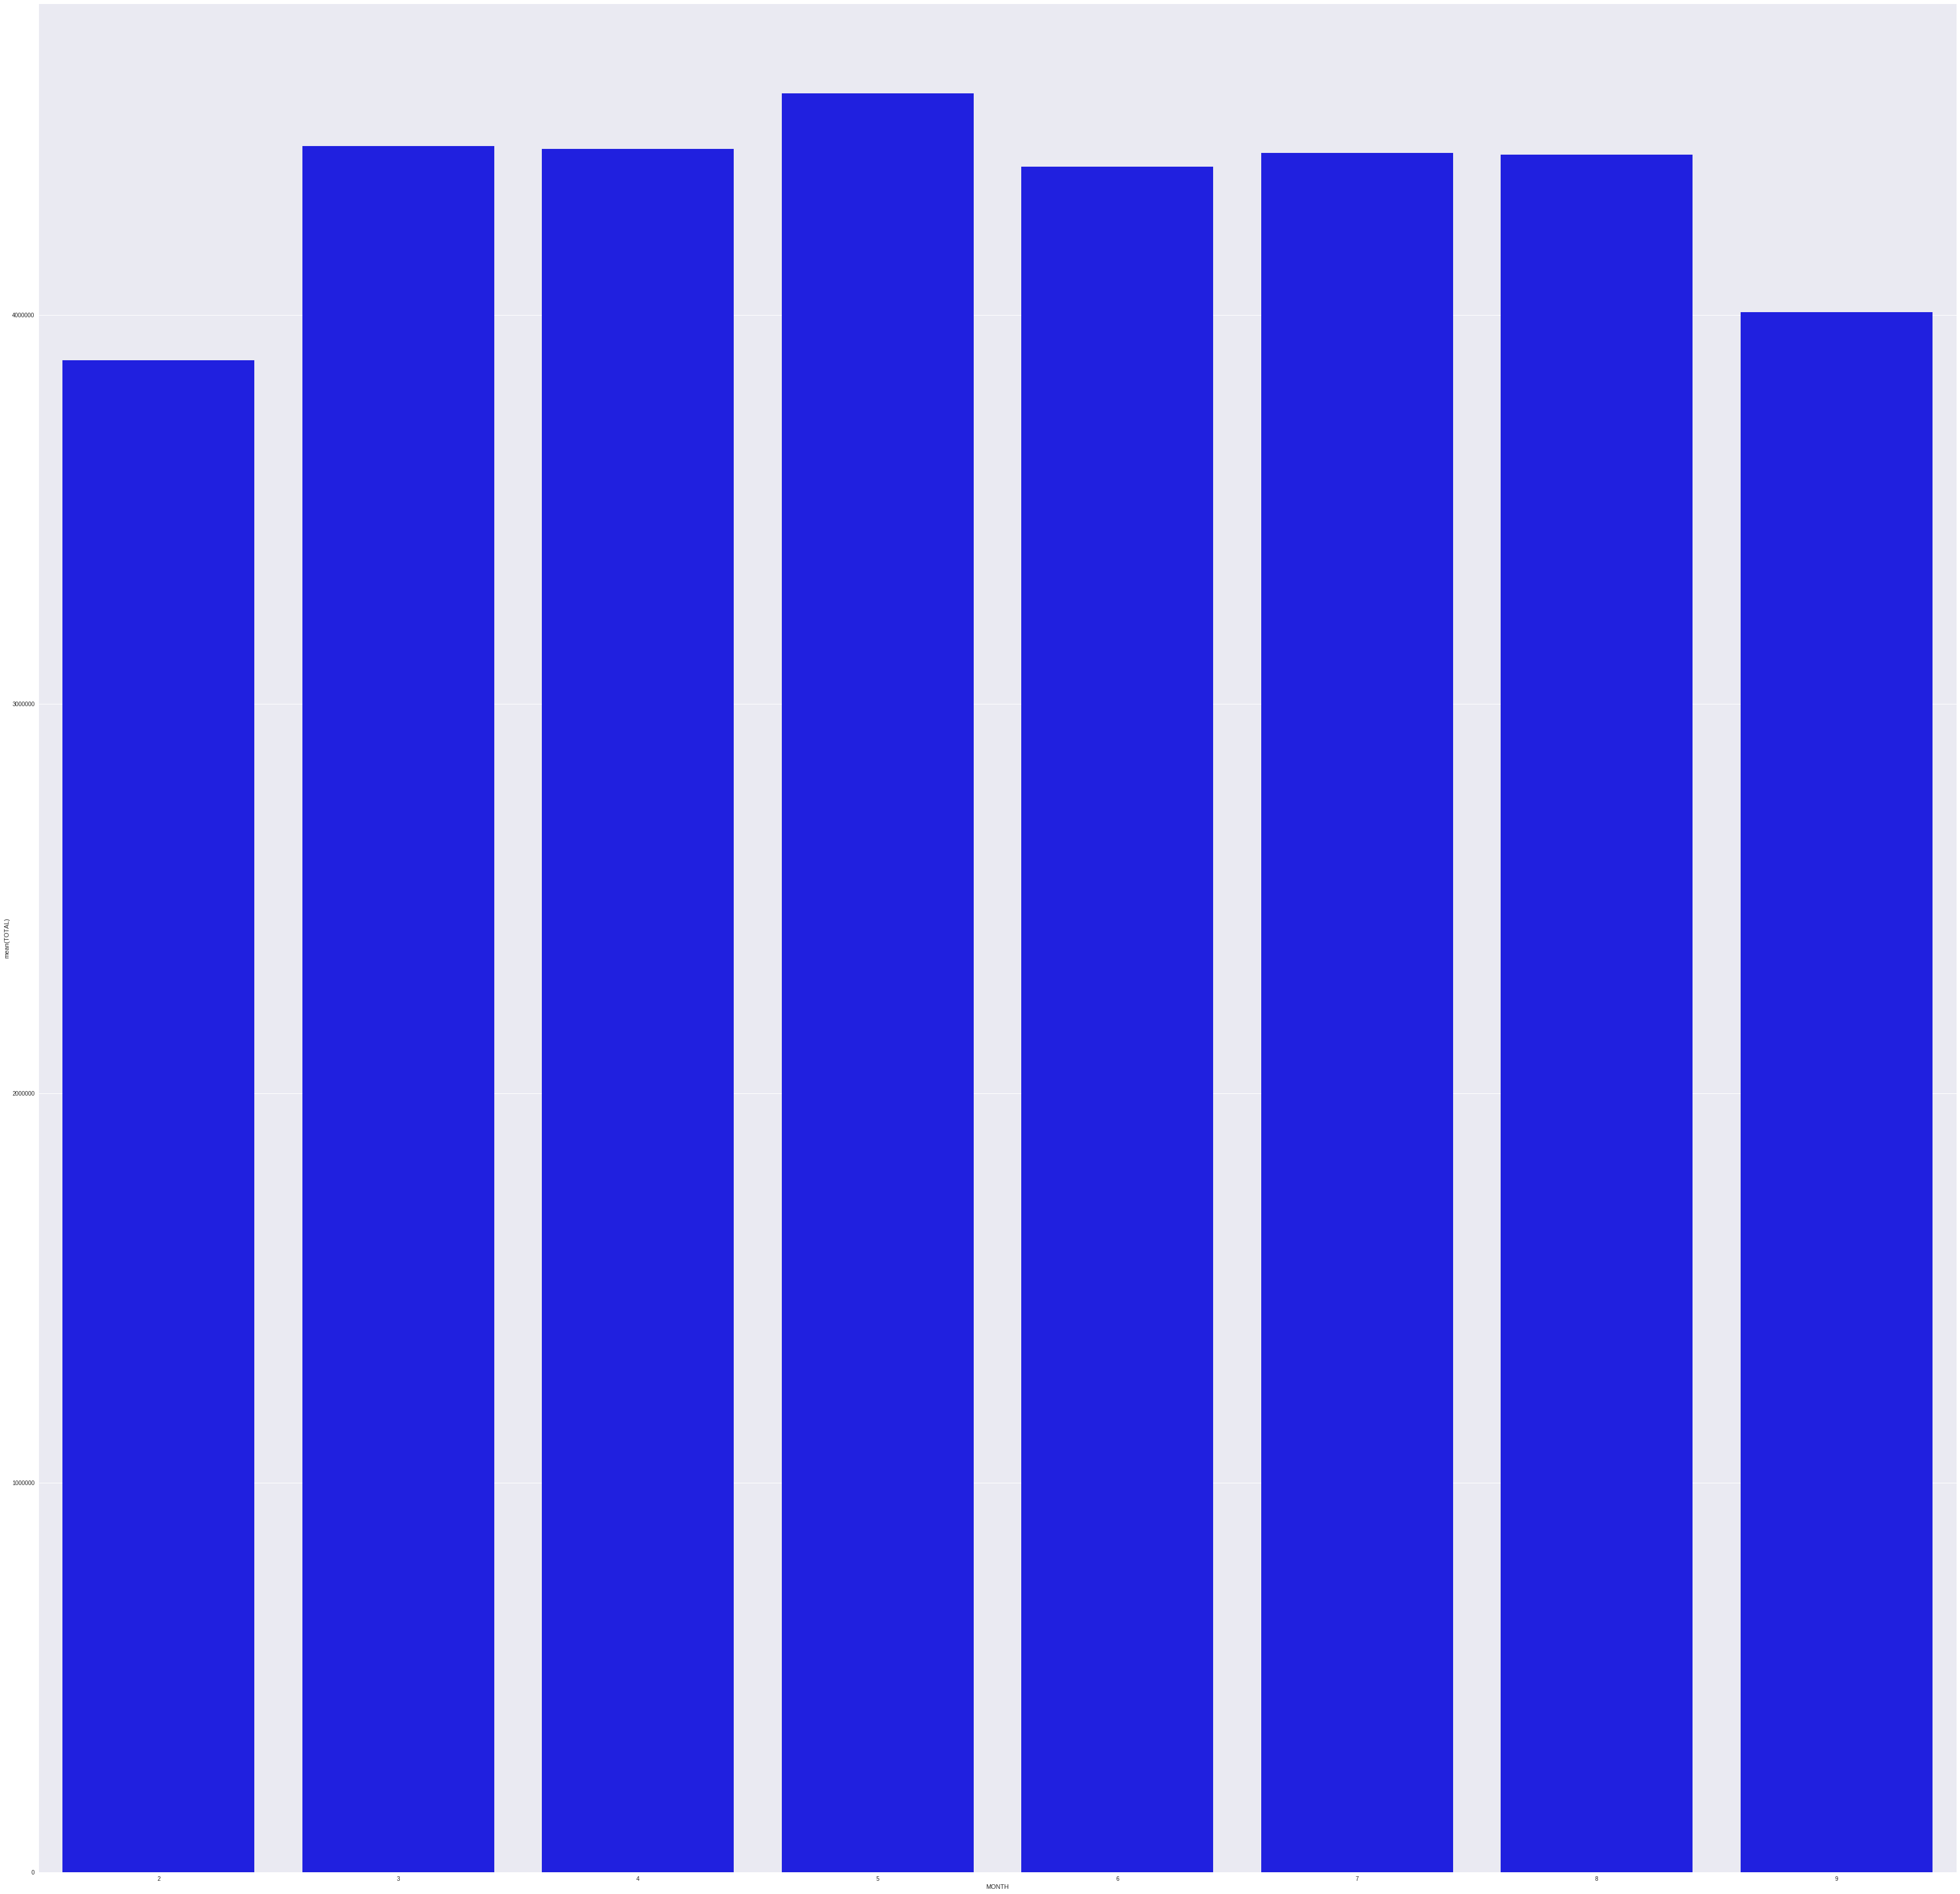

In [409]:
plt.figure(figsize=(60,60))
sns.barplot(y='TOTAL',x='MONTH', data=pandas_year_month, color='b');

In [356]:
pandas_TIME_grouping = mta_42_street2_sorted.groupby(["TIME"])["Total_entries_exits"].agg(sum)

In [357]:
pandas_TIME_grouping

TIME
00:00:00    2.264106e+06
01:00:00    5.992803e+06
01:17:16    9.400000e+01
01:18:42    0.000000e+00
02:00:00    1.597082e+06
03:00:00    7.726508e+09
03:38:24    4.880000e+02
04:00:00    2.822750e+05
05:00:00    2.386360e+05
06:00:00    3.539700e+05
07:00:00    7.990120e+05
07:41:42    2.496000e+03
07:45:02    2.913000e+03
07:51:25    3.045000e+03
07:52:48    3.299000e+03
07:54:14    1.217000e+03
08:00:00    2.768731e+06
08:00:48    0.000000e+00
08:01:49    2.269000e+03
08:04:11    4.443000e+03
08:04:42    1.820000e+02
08:08:45    3.530000e+02
08:09:29    3.666000e+03
08:11:25    1.256000e+03
08:17:46    6.230000e+02
08:25:56    3.531000e+03
08:27:46    1.837000e+03
08:28:09    2.858000e+03
08:28:31    1.442000e+03
08:29:30    5.945000e+03
                ...     
15:49:33    5.000000e+01
15:50:10    4.600000e+01
15:50:53    6.000000e+01
15:51:20    5.900000e+01
15:52:16    4.600000e+01
15:52:28    4.600000e+01
15:53:36    7.600000e+01
15:54:02    9.300000e+01
15:54:56    8.100000

In [362]:
valid_time_list = []
for i in mta_42_street2_sorted["TIME"].unique():
    if (i.split(":")[1] == "00" and i.split(":")[2] =="00"):
        valid_time_list.append(i)

mta_42_data_filtered_valida_date = mta_42_street2_sorted.loc[mta_42_street2_sorted["TIME"].isin(valid_time_list)]       

mta_42_data_filtered_valida_date["TIME"].unique()

array(['09:00:00', '13:00:00', '17:00:00', '21:00:00', '01:00:00',
       '05:00:00', '06:00:00', '10:00:00', '14:00:00', '18:00:00',
       '22:00:00', '02:00:00', '03:00:00', '07:00:00', '11:00:00',
       '15:00:00', '19:00:00', '23:00:00', '04:00:00', '08:00:00',
       '12:00:00', '16:00:00', '20:00:00', '00:00:00'], dtype=object)

In [363]:
pandas_TIME_grouping = mta_42_data_filtered_valida_date.groupby(["TIME"])["Total_entries_exits"].agg(sum)

In [364]:
pandas_TIME_grouping

TIME
00:00:00    2.264106e+06
01:00:00    5.992803e+06
02:00:00    1.597082e+06
03:00:00    7.726508e+09
04:00:00    2.822750e+05
05:00:00    2.386360e+05
06:00:00    3.539700e+05
07:00:00    7.990120e+05
08:00:00    2.768731e+06
09:00:00    8.555910e+05
10:00:00    1.999660e+06
11:00:00    3.373703e+06
12:00:00    4.868825e+06
13:00:00    6.533591e+07
14:00:00    2.247577e+06
15:00:00    1.839195e+06
16:00:00    3.332113e+06
17:00:00    2.138492e+06
18:00:00    3.494673e+06
19:00:00    3.610887e+06
20:00:00    5.703316e+06
21:00:00    2.130843e+06
22:00:00    3.211549e+06
23:00:00    1.772191e+06
Name: Total_entries_exits, dtype: float64

In [368]:
pandas_TIME_grouping= pandas_TIME_grouping.reset_index()

In [369]:
pandas_TIME_grouping["Total_entries_exits_by_time"] = pandas_TIME_grouping.Total_entries_exits.astype(int)

In [383]:
#pandas_TIME_grouping.drop([3], inplace=True)
pandas_TIME_grouping.reset_index()

,index,TIME,Total_entries_exits,Total_entries_exits_by_time
0,1,01:00:00,5992803.0,5992803
1,2,02:00:00,1597082.0,1597082
2,4,04:00:00,282275.0,282275
3,5,05:00:00,238636.0,238636
4,6,06:00:00,353970.0,353970
5,7,07:00:00,799012.0,799012
6,8,08:00:00,2768731.0,2768731
7,9,09:00:00,855591.0,855591
8,10,10:00:00,1999660.0,1999660
9,11,11:00:00,3373703.0,3373703


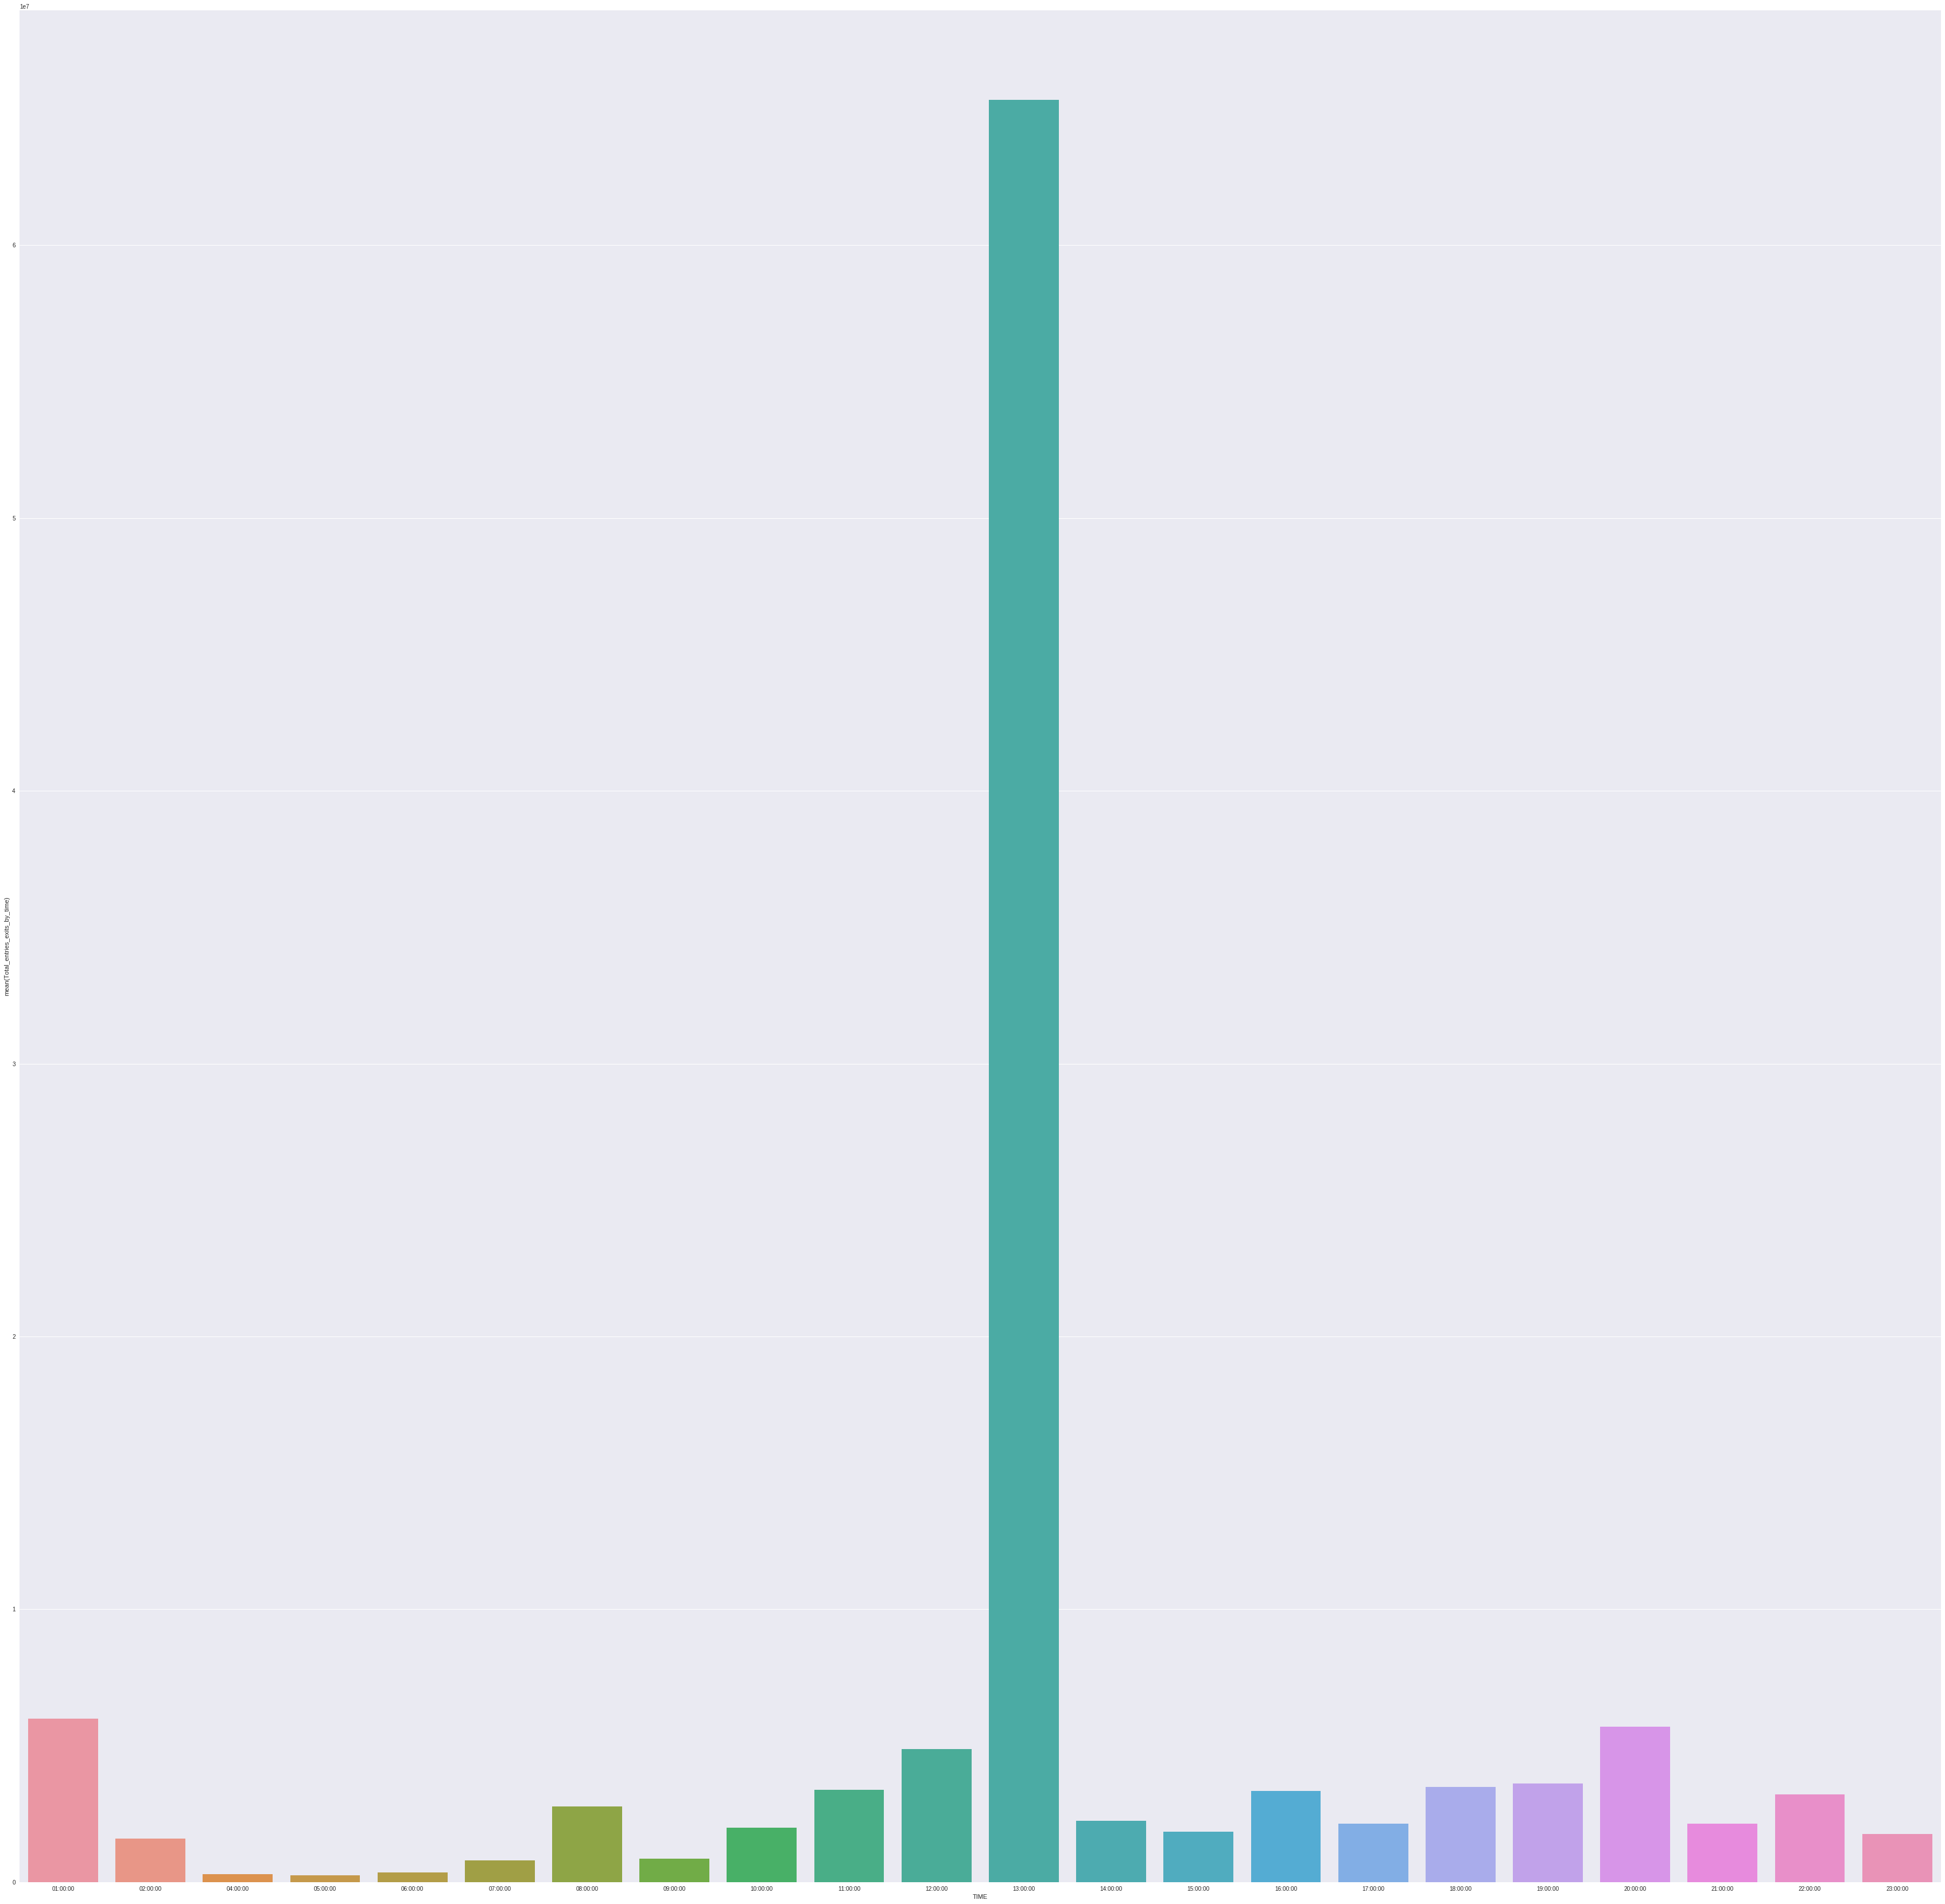

In [385]:
plt.figure(figsize=(60,60))
sns.barplot(x="TIME", y="Total_entries_exits_by_time", data=pandas_TIME_grouping)

## Tahmid

In [174]:
# Added total column for total traffic
mta_cleaned_data_filtered_valida_date["TOTAL"] = mta_cleaned_data_filtered_valida_date["ENTRIES"] + mta_cleaned_data_filtered_valida_date["EXITS"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [175]:
mta_cleaned_data_filtered_valida_date.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME,DATETIME2,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558,12/30/2017 03:00:00,12/30/2017 03:00:00,2017-12-30 03:00:00,8650667
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567,12/30/2017 07:00:00,12/30/2017 07:00:00,2017-12-30 07:00:00,8650686
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654,12/30/2017 11:00:00,12/30/2017 11:00:00,2017-12-30 11:00:00,8650832
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736,12/30/2017 15:00:00,12/30/2017 15:00:00,2017-12-30 15:00:00,8651109
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803,12/30/2017 19:00:00,12/30/2017 19:00:00,2017-12-30 19:00:00,8651515


In [176]:
mta_20_raw = mta_cleaned_data_filtered_valida_date.loc[mta_cleaned_data_filtered_valida_date["STATION"].isin(top_20_station_list)]  

In [177]:
mta_20_sort = mta_20_raw.sort_values(by=["STATION","C/A","UNIT","SCP","DATETIME2"], ascending=True)

In [178]:
mta_20_sort.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME,DATETIME2,TOTAL
39635,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,03:00:00,REGULAR,5831652,4798274,12/30/2017 03:00:00,NaN,2017-12-30 03:00:00,10629926
39636,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,07:00:00,REGULAR,5831706,4798280,12/30/2017 07:00:00,NaN,2017-12-30 07:00:00,10629986
39637,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,11:00:00,REGULAR,5831837,4798293,12/30/2017 11:00:00,NaN,2017-12-30 11:00:00,10630130
39638,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,15:00:00,REGULAR,5831928,4798310,12/30/2017 15:00:00,NaN,2017-12-30 15:00:00,10630238
39639,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,19:00:00,REGULAR,5832005,4798338,12/30/2017 19:00:00,NaN,2017-12-30 19:00:00,10630343


In [180]:
mta_20_sort["STATION"].unique()

array(['104 ST', '14 ST', '23 ST', '34 ST-HERALD SQ', '42 ST-PORT AUTH',
       '72 ST', 'CANAL ST', 'CHAMBERS ST', 'FULTON ST', 'TIMES SQ-42 ST'],
      dtype=object)

In [185]:
mta_20_sort["ENTRIES_A"] = mta_20_sort["ENTRIES"].diff()
mta_20_sort["EXITS_A"] = mta_20_sort["EXITS"].diff()
mta_20_sort["TOTAL_A"] = mta_20_sort["TOTAL"].diff()

In [224]:
mta_20_sort.describe()

,ENTRIES,EXITS,TOTAL,ENTRIES_A,EXITS_A,TOTAL_A
count,1.105116e+06,1.105116e+06,1.105116e+06,1.105115e+06,1.105115e+06,1.105115e+06
mean,1.045364e+08,9.981882e+07,2.043552e+08,1.786040e+00,-2.070162e+00,-2.841216e-01
std,3.619938e+08,3.559911e+08,6.822714e+08,1.115658e+07,1.093208e+07,2.082111e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,-2.117211e+09,-2.050113e+09,-3.817479e+09
25%,1.045594e+06,6.130848e+05,2.258954e+06,1.200000e+01,1.000000e+01,2.900000e+01
50%,4.102830e+06,2.708972e+06,7.584667e+06,8.700000e+01,7.000000e+01,2.000000e+02
75%,1.051404e+07,8.008482e+06,1.927015e+07,2.880000e+02,2.260000e+02,5.780000e+02
max,2.130153e+09,2.050239e+09,3.828507e+09,2.121981e+09,2.035992e+09,3.803617e+09


In [191]:
# Dropped first row because NA
mta_20_sort.drop([39635])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,DATETIME,DATETIME2,TOTAL,ENTRIES_A,EXITS_A,TOTAL_A
39636,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,07:00:00,REGULAR,5831706,4798280,12/30/2017 07:00:00,NaN,2017-12-30 07:00:00,10629986,54.0,6.0,60.0
39637,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,11:00:00,REGULAR,5831837,4798293,12/30/2017 11:00:00,NaN,2017-12-30 11:00:00,10630130,131.0,13.0,144.0
39638,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,15:00:00,REGULAR,5831928,4798310,12/30/2017 15:00:00,NaN,2017-12-30 15:00:00,10630238,91.0,17.0,108.0
39639,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,19:00:00,REGULAR,5832005,4798338,12/30/2017 19:00:00,NaN,2017-12-30 19:00:00,10630343,77.0,28.0,105.0
39640,J034,R007,00-00-00,104 ST,JZ,BMT,12/30/2017,23:00:00,REGULAR,5832052,4798351,12/30/2017 23:00:00,NaN,2017-12-30 23:00:00,10630403,47.0,13.0,60.0
39641,J034,R007,00-00-00,104 ST,JZ,BMT,12/31/2017,03:00:00,REGULAR,5832056,4798365,12/31/2017 03:00:00,NaN,2017-12-31 03:00:00,10630421,4.0,14.0,18.0
39642,J034,R007,00-00-00,104 ST,JZ,BMT,12/31/2017,07:00:00,REGULAR,5832093,4798371,12/31/2017 07:00:00,NaN,2017-12-31 07:00:00,10630464,37.0,6.0,43.0
39643,J034,R007,00-00-00,104 ST,JZ,BMT,12/31/2017,11:00:00,REGULAR,5832179,4798373,12/31/2017 11:00:00,NaN,2017-12-31 11:00:00,10630552,86.0,2.0,88.0
39644,J034,R007,00-00-00,104 ST,JZ,BMT,12/31/2017,15:00:00,REGULAR,5832251,4798387,12/31/2017 15:00:00,NaN,2017-12-31 15:00:00,10630638,72.0,14.0,86.0
39645,J034,R007,00-00-00,104 ST,JZ,BMT,12/31/2017,19:00:00,REGULAR,5832311,4798399,12/31/2017 19:00:00,NaN,2017-12-31 19:00:00,10630710,60.0,12.0,72.0


In [192]:
mta_20_data_out = mta_20_sort[(mta_20_sort["DATETIME2"] > "2018-03-01")]

In [193]:
mta_20_data_out.describe()

,ENTRIES,EXITS,TOTAL,ENTRIES_A,EXITS_A,TOTAL_A
count,9.185720e+05,9.185720e+05,9.185720e+05,9.185720e+05,9.185720e+05,9.185720e+05
mean,1.042262e+08,9.952577e+07,2.037519e+08,-4.515907e+03,-3.530051e+03,-8.045958e+03
std,3.613538e+08,3.553024e+08,6.809159e+08,4.692868e+06,4.141271e+06,8.351782e+06
min,0.000000e+00,0.000000e+00,2.000000e+00,-2.113960e+09,-2.050113e+09,-3.603884e+09
25%,1.021256e+06,6.086715e+05,2.205408e+06,1.200000e+01,1.100000e+01,2.900000e+01
50%,4.102913e+06,2.723320e+06,7.566298e+06,8.900000e+01,7.200000e+01,2.050000e+02
75%,1.054939e+07,8.025278e+06,1.927990e+07,2.930000e+02,2.300000e+02,5.880000e+02
max,2.130060e+09,2.050239e+09,3.828507e+09,2.105700e+09,2.035992e+09,3.263848e+09


In [194]:
mta_20_data_totH = mta_20_data_out[(mta_20_data_out["TOTAL_A"] < 700)]

In [195]:
mta_20_data_totL = mta_20_data_totH[(mta_20_data_totH["TOTAL_A"] > 0)]

In [196]:
mta_20_data_exH = mta_20_data_totL[(mta_20_data_totL["EXITS_A"] < 400)]

In [197]:
mta_20_data_exL = mta_20_data_exH[(mta_20_data_exH["EXITS_A"] > 0)]

In [198]:
mta_20_data_enH = mta_20_data_exL[(mta_20_data_exL["ENTRIES_A"] < 400)]

In [199]:
mta_20_data = mta_20_data_enH[(mta_20_data_enH["ENTRIES_A"] > 0)]

In [200]:
mta_20_data.describe()

,ENTRIES,EXITS,TOTAL,ENTRIES_A,EXITS_A,TOTAL_A
count,5.220500e+05,5.220500e+05,5.220500e+05,522050.000000,522050.000000,522050.000000
mean,5.606184e+07,3.898849e+07,9.505033e+07,108.606055,91.486591,200.092646
std,2.544038e+08,1.911519e+08,4.287151e+08,105.348721,95.994132,168.461213
min,7.000000e+00,8.000000e+00,1.500000e+01,1.000000,1.000000,2.000000
25%,1.261413e+06,8.102988e+05,2.657578e+06,21.000000,16.000000,51.000000
50%,3.948864e+06,2.450135e+06,6.856394e+06,69.000000,54.000000,158.000000
75%,8.443578e+06,6.397204e+06,1.595696e+07,174.000000,139.000000,316.000000
max,2.115780e+09,2.030993e+09,3.828506e+09,399.000000,399.000000,699.000000


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

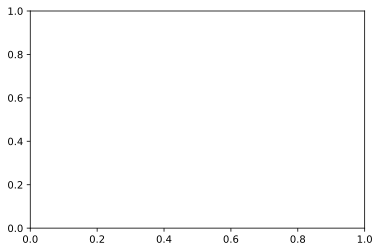

In [105]:
plt.xticks(size = 10)
plt.yticks(size = 10)

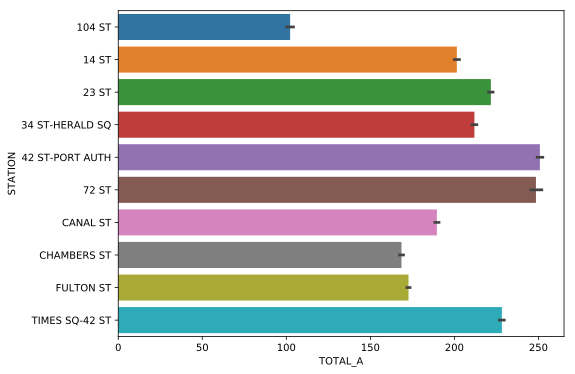

In [210]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'STATION',x='TOTAL_A',data=mta_20_data);

In [203]:
mta_20_data["STATION"].unique()

array(['104 ST', '14 ST', '23 ST', '34 ST-HERALD SQ', '42 ST-PORT AUTH',
       '72 ST', 'CANAL ST', 'CHAMBERS ST', 'FULTON ST', 'TIMES SQ-42 ST'],
      dtype=object)

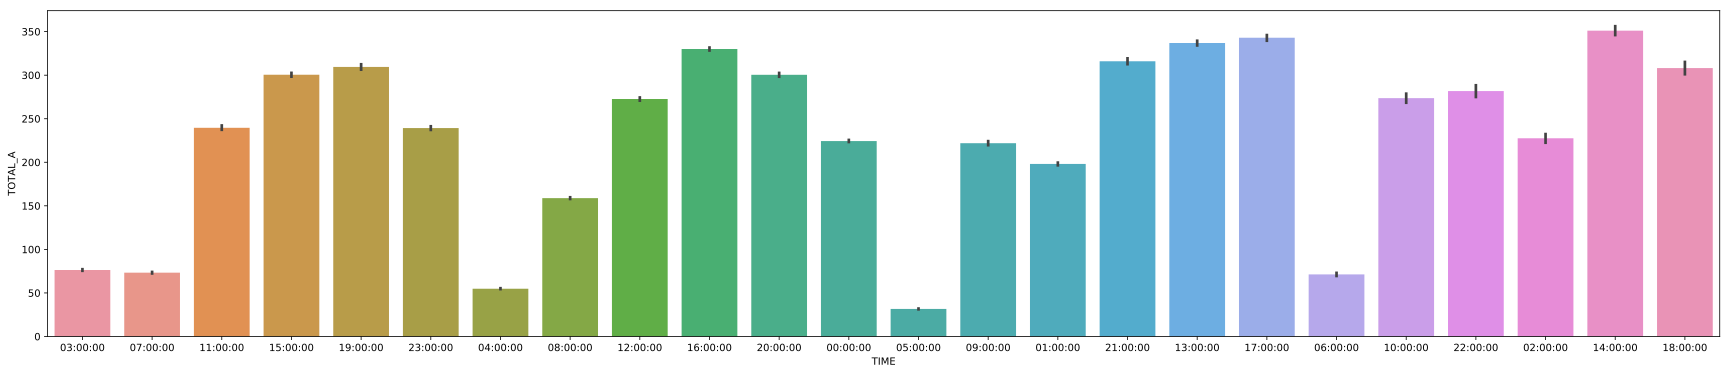

In [215]:
plt.figure(figsize=(30,6))
sns.barplot(x = 'TIME', y='TOTAL_A',data=mta_20_data);